# Introduction


**What?** Curve Fitting with Bayesian Ridge Regression



# Import modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 25

# Bayesian Ridge Regression


- BayesianRidge estimates a probabilistic model of the regression problem as described above.  
- Is similar to the classical Ridge.



# Generating a synthetic curve

In [3]:
# Generate sinusoidal data with noise
def func(x): return np.sin(2*np.pi*x)

size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 1., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 1., 100)

# Fitting

In [4]:
# Fit by cubic polynomial
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

# Plotting


- Compares two graphs, one with the default parameters the other with some tuned ones.



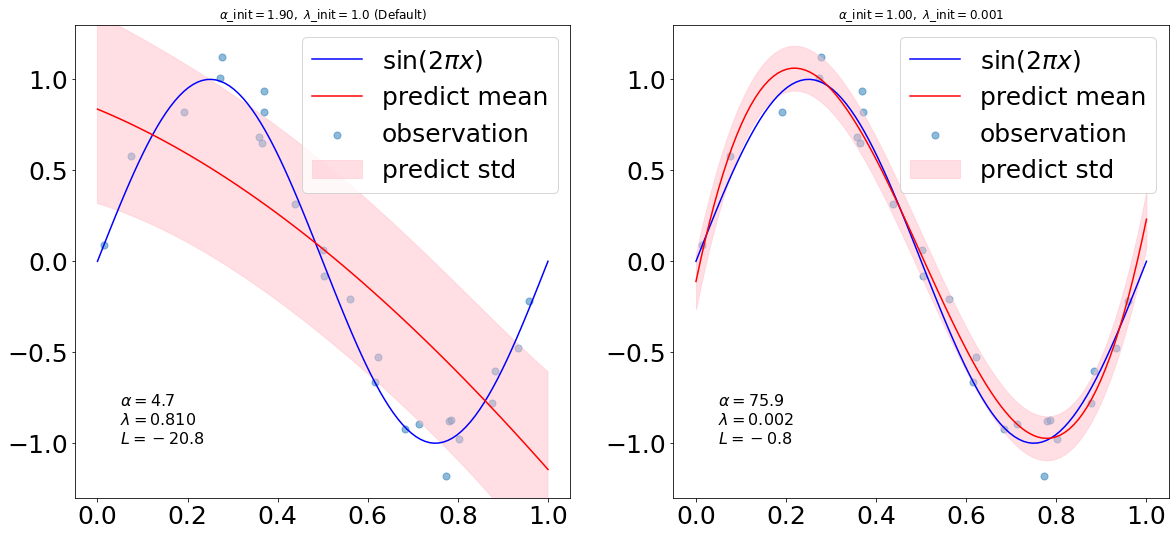

In [12]:
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol = 1e-6, fit_intercept = False, compute_score = True)
fig, axes = plt.subplots(1, 2)
for i, ax in enumerate(axes):
    
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        # Default values
        init = [1 / np.var(y_train), 1.]  
    elif i == 1:
        # Provided by the user
        init = [1., 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize = 16)

plt.tight_layout()
plt.show()

# References


- https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html#sphx-glr-auto-examples-linear-model-plot-bayesian-ridge-curvefit-py
- https://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression
    
